# CLASSIFICATION OF FASHION MNIST DATASET

In [1]:
import tensorflow as tf # deep learning library. Tensors are just multi-dimensional arrays

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten


# Aditional Libs
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split





Using TensorFlow backend.


In [2]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


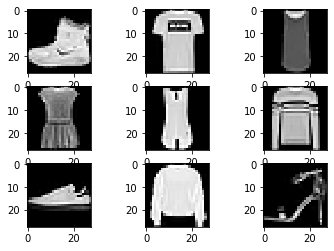

In [3]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist # load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data() # summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape)) # plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [4]:
print(type(fashion_mnist), fashion_mnist)

<class 'module'> <module 'keras.datasets.fashion_mnist' from 'C:\\Users\\ingle\\Anaconda3\\lib\\site-packages\\keras\\datasets\\fashion_mnist.py'>


In [5]:
#np.random.seed(42)   # shuffing the training dataset randomly
#random_arr_60000 = np.arange(60000)
#np.random.shuffle(random_arr_60000 )
#random_arr_60000 

In [6]:
#trainX,testX , trainy, testy  = train_test_split(trainX, trainy, test_size = 1/12, random_state = 42)
# use only for using an additional vadition dataset of 5000 images 

In [7]:
trainX.shape #f=getting the diamensions of rhe dataset

(60000, 28, 28)

In [8]:
print (testX)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [9]:
print (trainX)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
trainX.shape

(60000, 28, 28)

In [12]:
len(trainy)  

60000

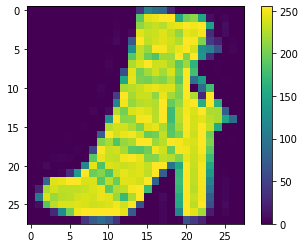

In [13]:
plt.figure()   # plotting one of the image
plt.imshow(trainX[11])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
trainX = trainX / 255.0 #Scaling the pixel value of the image as one pixel has 0 to 255 values

testX = testX / 255.0

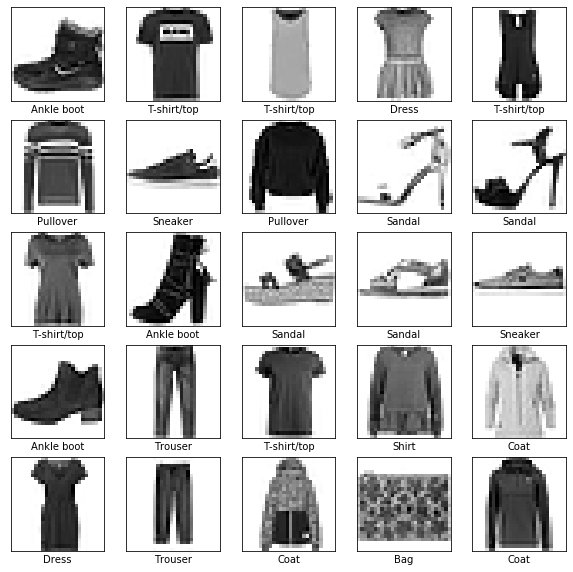

In [15]:
plt.figure(figsize=(10,10)) #Displaying the first 25 images 
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainy[i]])
plt.show()

In [16]:
model = tf.keras.models.Sequential() #Feed forward model

In [17]:
model.add(tf.keras.layers.Flatten()) #28*28 image to a 1*781 data set

In [18]:
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu)) #Fully connected feedforward neural network eith activation function as relu

In [19]:
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))

In [20]:
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [21]:
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [22]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output activaation function is Softmax

In [23]:
model.compile(optimizer='adam',# optimizer
              loss='sparse_categorical_crossentropy', #Calculation of the error 
              metrics=['accuracy'])

In [24]:
#from keras_sequential_ascii import sequential_model_to_ascii_printout
#sequential_model_to_ascii_printout(model)

In [25]:
model.fit(trainX,trainy, epochs=3,batch_size=32) #Train the model with 3 epochs

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 139us/sample - loss: 0.5116 - accuracy: 0.8191
Epoch 2/3
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3813 - accuracy: 0.8619
Epoch 3/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3439 - accuracy: 0.8742


In [26]:
#model.fit(trainX,trainy, epochs=1) #Train the model with 1 epochs

In [27]:
#model.fit(trainX,trainy, epochs=5) #Train the model with 5 epochs

 Test on out-of-sample data (data we didn't use to train the model).

In [28]:
val_loss, val_acc = model.evaluate(testX, testy) #Testing the model on the unknown data ie. the test set
print(val_loss)#models loss error 
print(val_acc) #models accuracy

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.35890460548400877
0.8682


In [29]:
model.save('128_4') #saving the model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 128_4\assets


In [30]:
new_model = tf.keras.models.load_model('128_4') #loading the model again

In [31]:
predictions = new_model.predict_classes(testX) # predictions 

In [32]:
print(predictions)

[9 2 1 ... 8 1 5]


In [33]:
predictions.shape


(10000,)

In [34]:
con_mat = tf.math.confusion_matrix(labels=testy, predictions=predictions).numpy()

print('----------------Confusion Matrix----------------')
print(con_mat)

----------------Confusion Matrix----------------
[[808   1  13  41   4   1 116   0  16   0]
 [  1 960   1  25   6   0   6   0   1   0]
 [ 16   1 754  12 148   0  62   0   7   0]
 [ 20   9  11 884  48   0  21   0   7   0]
 [  0   0  85  24 825   0  61   0   5   0]
 [  0   0   0   1   0 948   0  38   1  12]
 [136   1 104  34  75   0 632   0  18   0]
 [  0   0   0   0   0  15   0 966   1  18]
 [  4   0   0   6   5   1   5   4 975   0]
 [  0   0   0   0   0  13   1  56   0 930]]


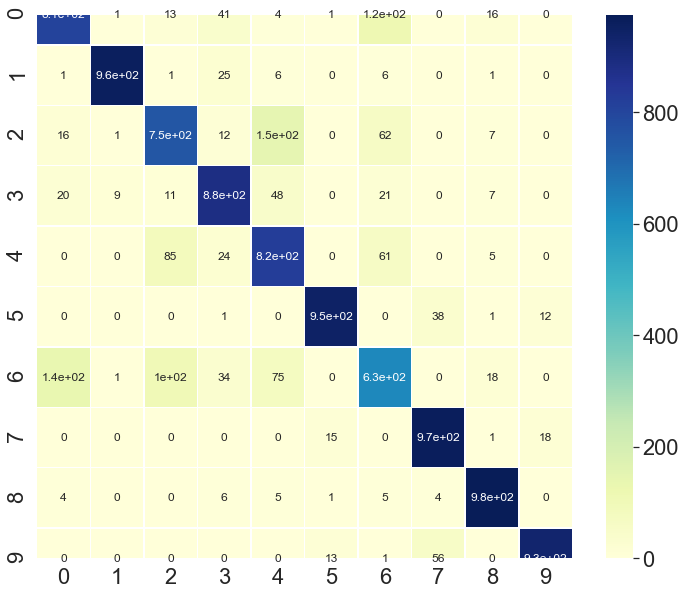

In [35]:
# Heatmap visualization for confusion Matrix

import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(con_mat, range(10), range(10))
plt.figure(figsize = (12,10))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlGnBu')# font size
plt.show()